# Winter 2015-16
12/22/2015 - 3/20/2016

In [171]:
from __future__ import print_function

import random
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [172]:
week_list = ['151219','151226','160102','160109','160116','160123','160130',
             '160206','160213','160220','160227','160305','160312','160319']
weeks = []
for week in week_list[:6]:
    string = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_' + week + '.txt'
    weeks.append(pd.read_csv(string).rename(columns=lambda x: x.strip()))
    
data = pd.concat(weeks)
data = data.reset_index()

In [173]:
data.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/12/2015,03:00:00,REGULAR,5448529,1839896
1,1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/12/2015,07:00:00,REGULAR,5448537,1839914
2,2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/12/2015,11:00:00,REGULAR,5448644,1840013
3,3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/12/2015,15:00:00,REGULAR,5448889,1840103
4,4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/12/2015,19:00:00,REGULAR,5449323,1840178


In [174]:
data['DATETIME'] = pd.to_datetime(data.DATE + data.TIME, format='%m/%d/%Y%H:%M:%S')

PERIOD is a variable that splits the day into 6 distinct sections. This is to account for the differences in times that the counts are recorded.

In [175]:
data['HOUR'] = data.DATETIME.map(lambda x: x.hour)
data['PERIOD'] = data.HOUR // 4

In [176]:
data['dENTRIES'] = data.groupby(['C/A','UNIT','SCP','STATION']).ENTRIES.diff()
data['dEXITS'] = data.groupby(['C/A','UNIT','SCP','STATION']).EXITS.diff()

In [177]:
# Anything over 6000 is probably an error
data = data[data.dENTRIES >= 0]
data = data[data.dEXITS >= 0]
data = data[data.dENTRIES <= 5000]
data = data[data.dEXITS <= 5000]

data['FLUX'] = data.dENTRIES + data.dEXITS
data.head()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,HOUR,PERIOD,dENTRIES,dEXITS,FLUX
1,1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/12/2015,07:00:00,REGULAR,5448537,1839914,2015-12-12 07:00:00,7,1,8,18,26
2,2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/12/2015,11:00:00,REGULAR,5448644,1840013,2015-12-12 11:00:00,11,2,107,99,206
3,3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/12/2015,15:00:00,REGULAR,5448889,1840103,2015-12-12 15:00:00,15,3,245,90,335
4,4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/12/2015,19:00:00,REGULAR,5449323,1840178,2015-12-12 19:00:00,19,4,434,75,509
5,5,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,12/12/2015,23:00:00,REGULAR,5449643,1840212,2015-12-12 23:00:00,23,5,320,34,354


In [178]:
data.describe()

,index,ENTRIES,EXITS,HOUR,PERIOD,dENTRIES,dEXITS,FLUX
count,1146911.000000,1.146911e+06,1.146911e+06,1146911.000000,1146911.000000,1146911.000000,1146911.000000,1146911.000000
mean,97120.082579,2.329257e+07,1.721601e+07,11.750907,2.504118,171.483665,130.553951,302.037616
std,56023.634310,1.451159e+08,1.230630e+08,6.922507,1.694025,254.489987,227.635888,388.029404
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48524.000000,5.574060e+05,2.898695e+05,7.000000,1.000000,12.000000,9.000000,35.000000
50%,97134.000000,2.434734e+06,1.428009e+06,11.000000,2.000000,73.000000,49.000000,159.000000
75%,145599.500000,6.180781e+06,4.375854e+06,19.000000,4.000000,230.000000,153.000000,425.000000
max,197665.000000,2.114548e+09,2.087387e+09,23.000000,5.000000,4034.000000,4975.000000,7047.000000


In [179]:
# Far more entries than exits. Possibly accounted for by 'emergency exits' and/or human sacrifice
print(sum(data.dENTRIES))
print(sum(data.dEXITS))

196676502.0
149733762.0


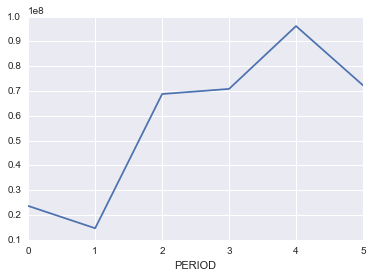

In [180]:
times = data.groupby('PERIOD').sum()
times.FLUX.plot()

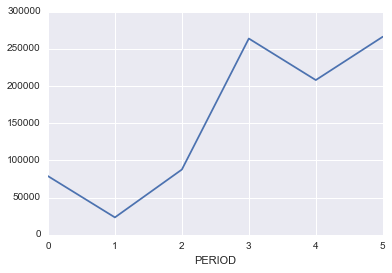

In [198]:
times = data[data.STATION == 'SOUTH FERRY'].groupby('PERIOD').sum()
times.FLUX.plot()

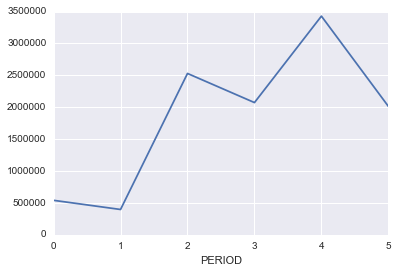

In [182]:
times = data[data.STATION == '34 ST-PENN STA'].groupby('PERIOD').sum()
times.FLUX.plot()

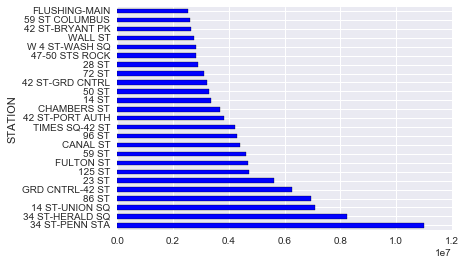

In [190]:
times = data.groupby(['STATION']).sum()
times.FLUX.sort_values(ascending=False)[:25].plot.barh()

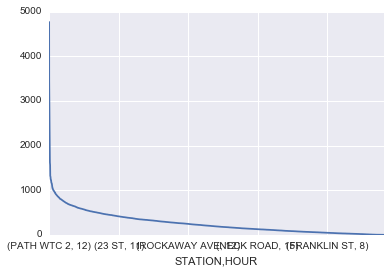

In [184]:
times = data.groupby(['STATION','HOUR']).median()
times.FLUX.sort_values(ascending=False).plot.line()

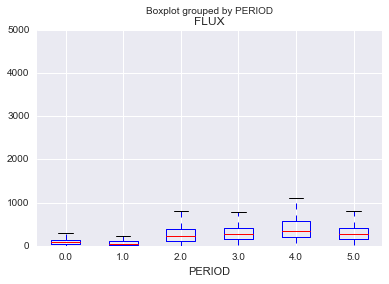

In [185]:
times.boxplot(column='FLUX',by='PERIOD')
plt.y_lim

In [186]:
geo_names = ['UNIT','C/A','STATION','X','DIVISION','LAT','LON']
geocodes = pd.read_csv('geocoded.csv', names = geo_names)
geocodes = geocodes.drop('X',1)
geocodes.head()

,UNIT,C/A,STATION,DIVISION,LAT,LON
0,R470,X002,ELTINGVILLE PK,SRT,40.544600,-74.164581
1,R544,PTH02,HARRISON,PTH,40.738879,-74.155533
2,R165,S102,TOMPKINSVILLE,SRT,40.636948,-74.074824
3,R070,S101,ST. GEORGE,SRT,40.643738,-74.073622
4,R070,S101A,ST. GEORGE,SRT,40.643738,-74.073622


In [187]:
data = pd.merge(data,geocodes,how='left',on=['C/A','UNIT','STATION','DIVISION'])

In [188]:
times.head()

index     ENTRIES       EXITS  PERIOD  dENTRIES  dEXITS   FLUX
STATION HOUR                                                                
1 AV    3     30130   6197808.0  11190655.5       0     109.5    97.5  252.5
        7     30116   6197518.5  11189588.0       1      35.0    76.5  137.0
        8     29600  10539998.0  11488102.0       2     240.0   127.0  263.0
        11    30117   6197859.5  11190400.5       2     236.5   327.5  687.0
        15    30118   6198047.5  11191060.5       3     246.5   309.0  707.5

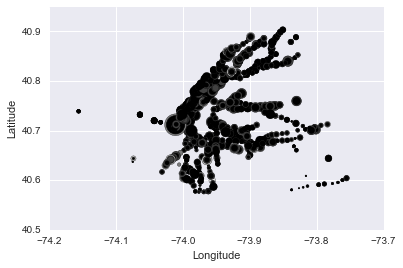

In [199]:
times = data.groupby(['STATION','HOUR']).median()
fig, ax = plt.subplots()
ax.scatter(times.LON,times.LAT,s=(times.FLUX)/10,c=times.PERIOD)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

In [196]:
data.STATION.unique()

array(['LEXINGTON AVE', '5 AVE-59 ST', '57 ST-7 AVE', '49 ST-7 AVE',
       '42 ST-TIMES SQ', '34 ST-HERALD SQ', '28 ST-BROADWAY',
       '23 ST-5 AVE', '14 ST-UNION SQ', "8 ST-B'WAY NYU",
       "PRINCE ST-B'WAY", 'CANAL ST', 'CITY HALL', 'CORTLANDT ST',
       'RECTOR ST', 'WHITEHALL ST', 'ESSEX ST', 'BOWERY', 'CHAMBERS ST',
       'FULTON ST', 'BROAD ST', '7 AVE', 'PARK PLACE', 'BOTANIC GARDEN',
       'PROSPECT PARK', 'PARKSIDE AVE', 'CHURCH AVE', 'BEVERLEY ROAD',
       'CORTELYOU ROAD', 'NEWKIRK PLAZA', 'AVE H', 'AVE J', 'AVE M',
       'KINGS HIGHWAY', 'AVE U', 'NECK ROAD', 'SHEEPSHEAD BAY',
       'BRIGHTON BEACH', 'OCEAN PARKWAY', 'BOROUGH HALL/CT',
       'JAY ST-METROTEC', 'DEKALB AVE', 'BARCLAYS CENTER', 'UNION ST',
       '9 ST', 'PROSPECT AVE', '25 ST', '36 ST', '45 ST', '53 ST', '59 ST',
       'BAY RIDGE AVE', '77 ST', '86 ST', 'BAY RIDGE-95 ST', '8 AVE',
       'FT HAMILTON PKY', 'NEW UTRECHT AVE', '18 AVE', '20 AVE',
       'BAY PKY-22 AVE', '9 AVE', '50 ST', '55 ST',